# Chapter 8: Tree-based methods

In [79]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,mean_absolute_error,accuracy_score

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Question 7
Uses 'Boston' dataset

In [3]:
boston=pd.read_csv('data/Boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


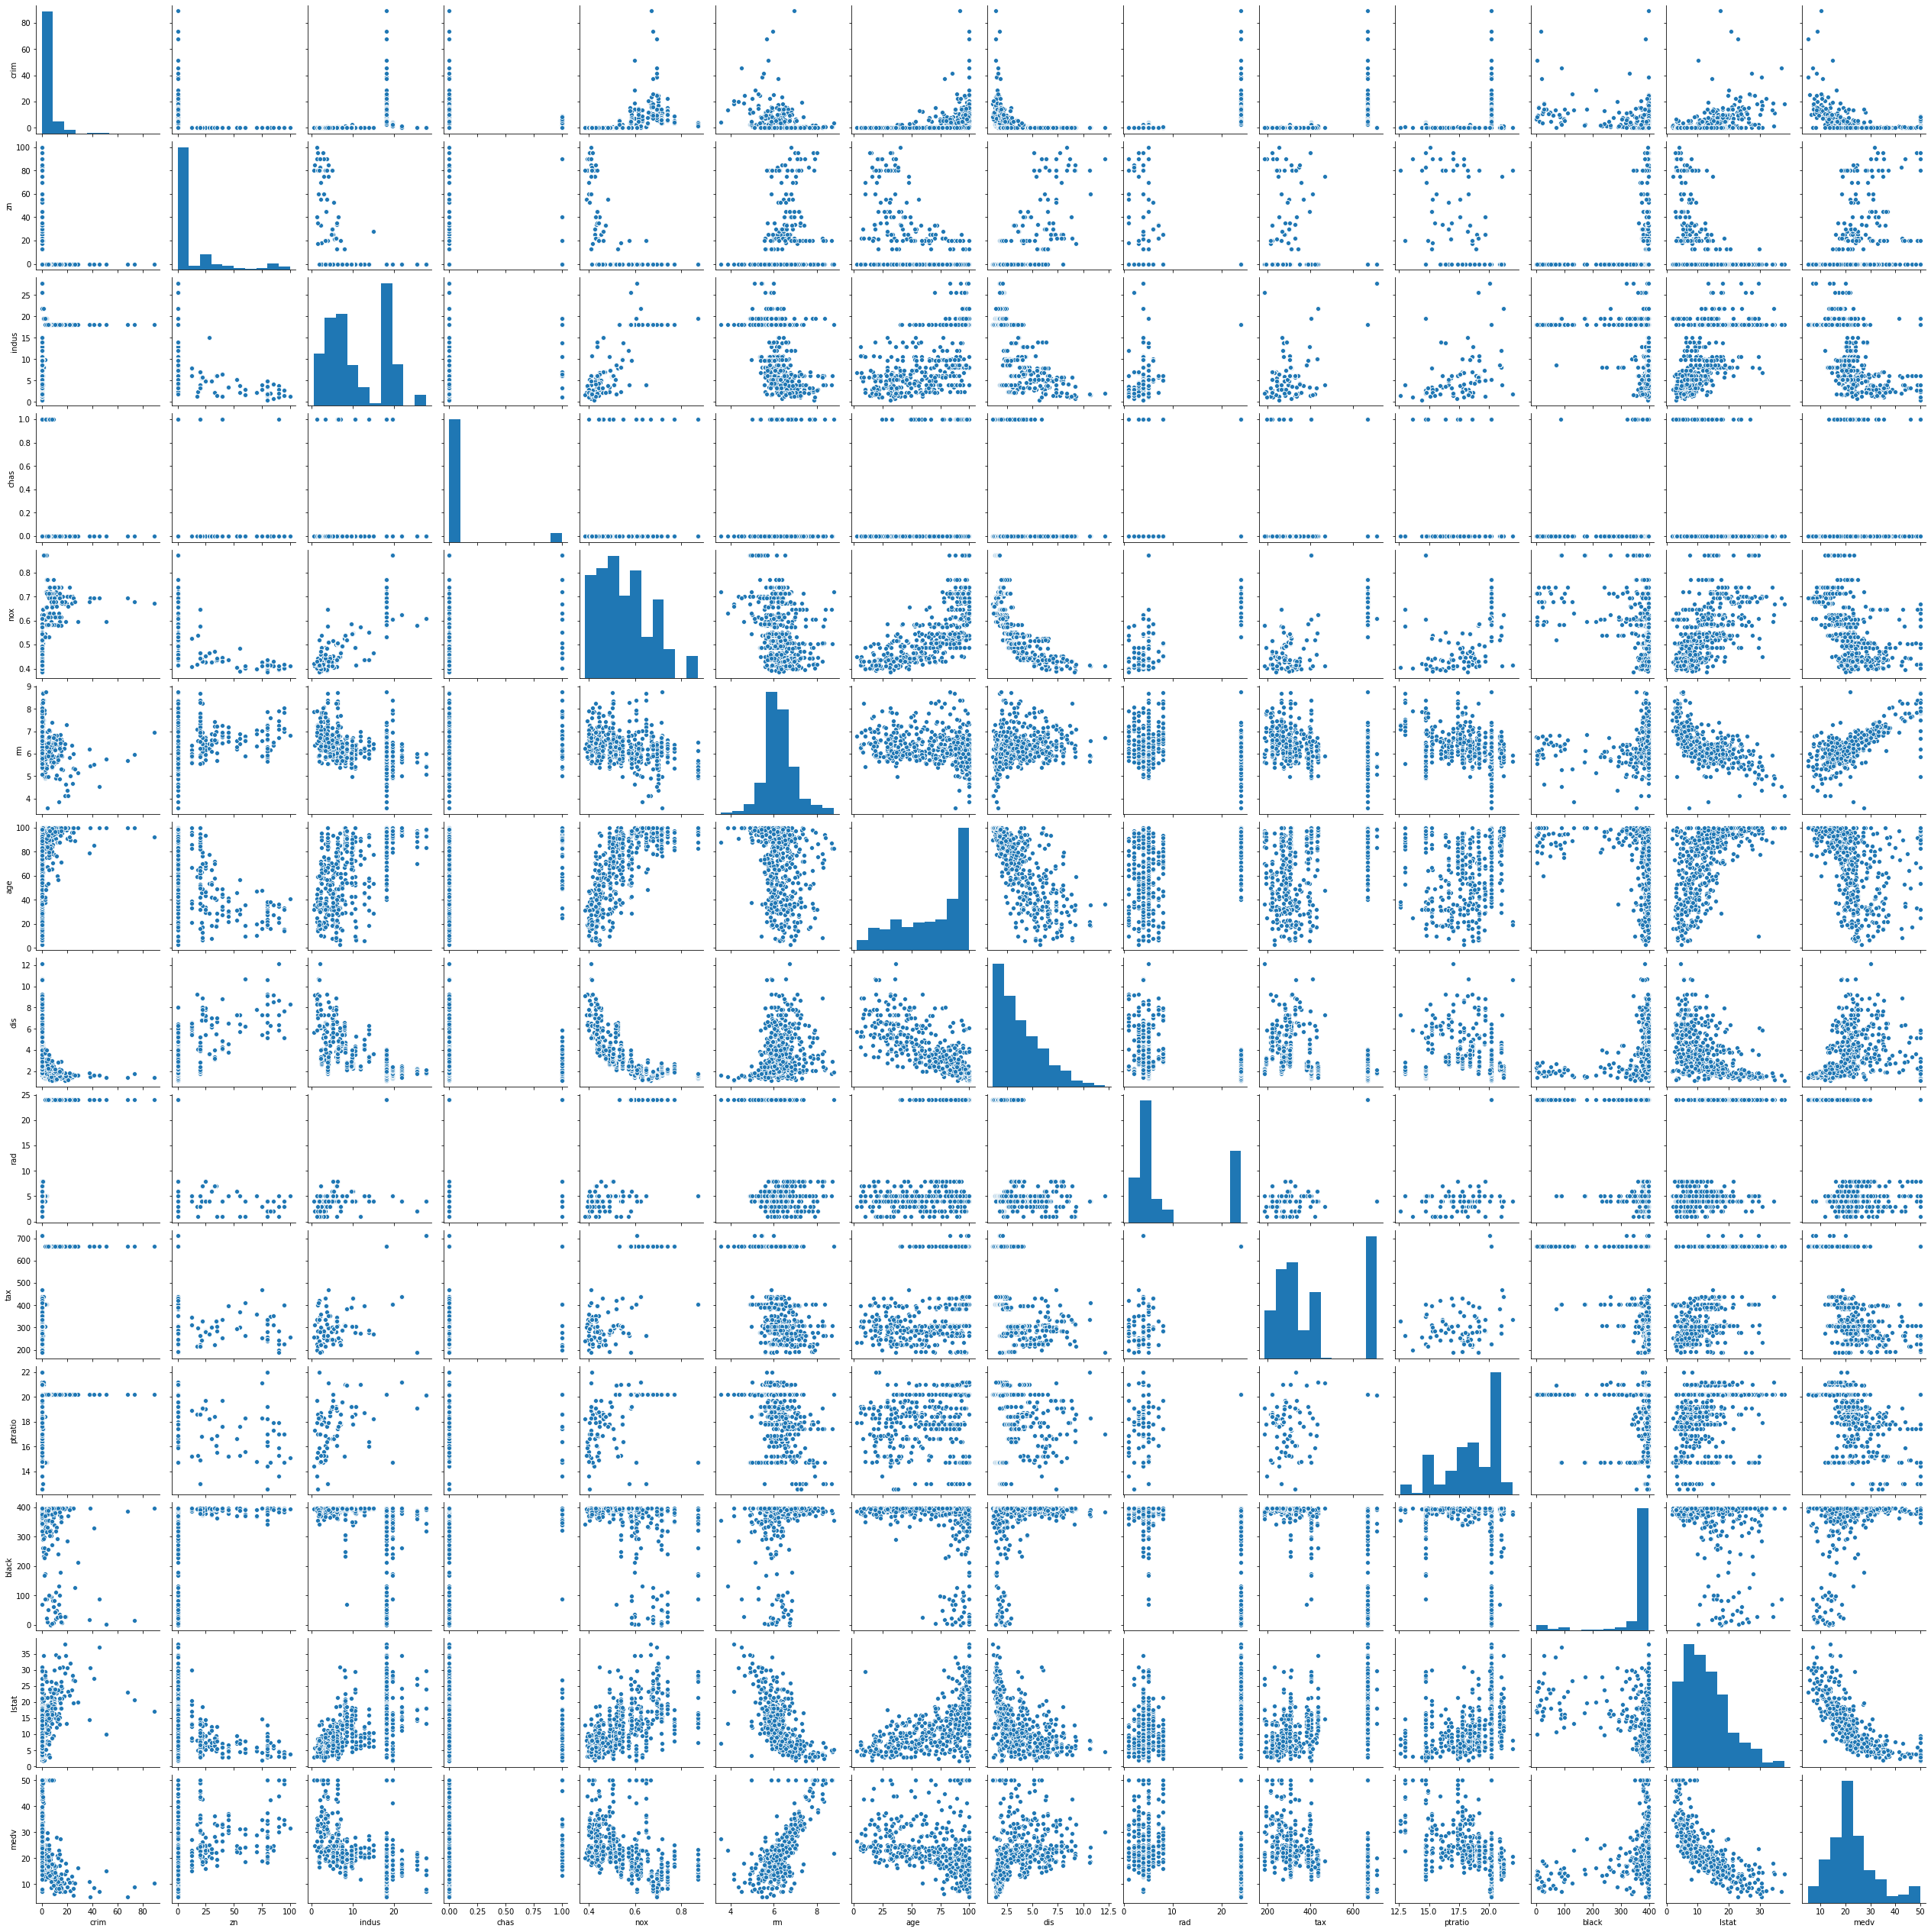

In [11]:
sns.pairplot(data=boston)

### Potential Predictors for Medv
- lstat
- rm
- dis

### Train/Test Split

In [5]:
X_train,X_test,y_train,y_test=train_test_split(boston.drop(columns=['medv']),boston['medv'],train_size=0.7)

### Modelling

In [6]:
model_rf=RandomForestRegressor(n_estimators=500,max_features=6)
model_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Features according to importance (scored through the Gini index):

In [9]:
{boston.columns[i]:model_rf.feature_importances_[i] for i in sorted(range(0,len(model_rf.feature_importances_)), key=lambda x: model_rf.feature_importances_[x], reverse=True)}

{'lstat': 0.3663172214257766,
 'rm': 0.2956326995485009,
 'dis': 0.07009938930955338,
 'crim': 0.06164033804848309,
 'indus': 0.05017829302634155,
 'nox': 0.04472585482854586,
 'ptratio': 0.03303243130937136,
 'tax': 0.024791713029267682,
 'age': 0.022928180686143544,
 'black': 0.018844305070345818,
 'rad': 0.005519279292419732,
 'zn': 0.0032350702128285855,
 'chas': 0.003055224212421948}

#### Comparing models with varying max_features

In [12]:
models=[]
for num_features in range(1,len(boston.columns)):
    model=RandomForestRegressor(n_estimators=500,max_features=num_features)
    model.fit(X_train,y_train)
    models.append(model)

Text(0, 0.5, 'MAE Test error')

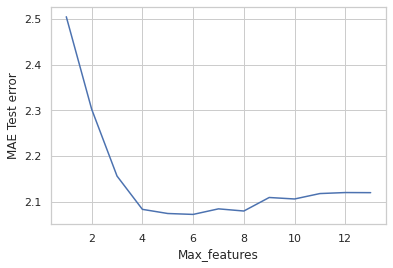

In [18]:
sns.set(style='whitegrid')
plt.plot(range(1,len(boston.columns)),[mean_absolute_error(y_test,model.predict(X_test)) for model in models])
plt.xlabel('Max_features')
plt.ylabel('MAE Test error')

#### Comparing models with varying trees

In [21]:
tr_models=[]
num_features=6
for num_trees in range(100,2000,100):
    model=RandomForestRegressor(n_estimators=num_trees,max_features=num_features)
    model.fit(X_train,y_train)
    tr_models.append(model)

Text(0, 0.5, 'MAE Test error')

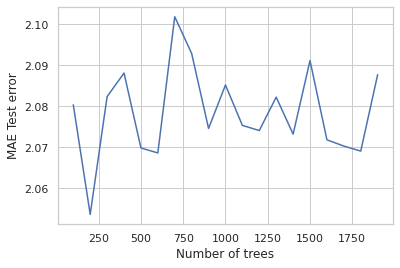

In [24]:
sns.set(style='whitegrid')
plt.plot(range(100,2000,100),[mean_absolute_error(y_test,model.predict(X_test)) for model in tr_models])
plt.xlabel('Number of trees')
plt.ylabel('MAE Test error')

## Question 9
Uses OJ dataset

In [29]:
oj=pd.read_csv('data/OJ.csv')
oj.set_index('Unnamed: 0',drop=True,inplace=True)
oj.index.name=""
oj.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
,,,,,,,,,,,,,,,,,,
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [37]:
X=oj.drop(columns=['Purchase'])
X['Store7']=(X['Store7']=='Yes')*1

### Split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,oj['Purchase'],train_size=800/1070)

### Unpruned Decision Tree

In [42]:
model_dt=DecisionTreeClassifier(random_state=10)
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

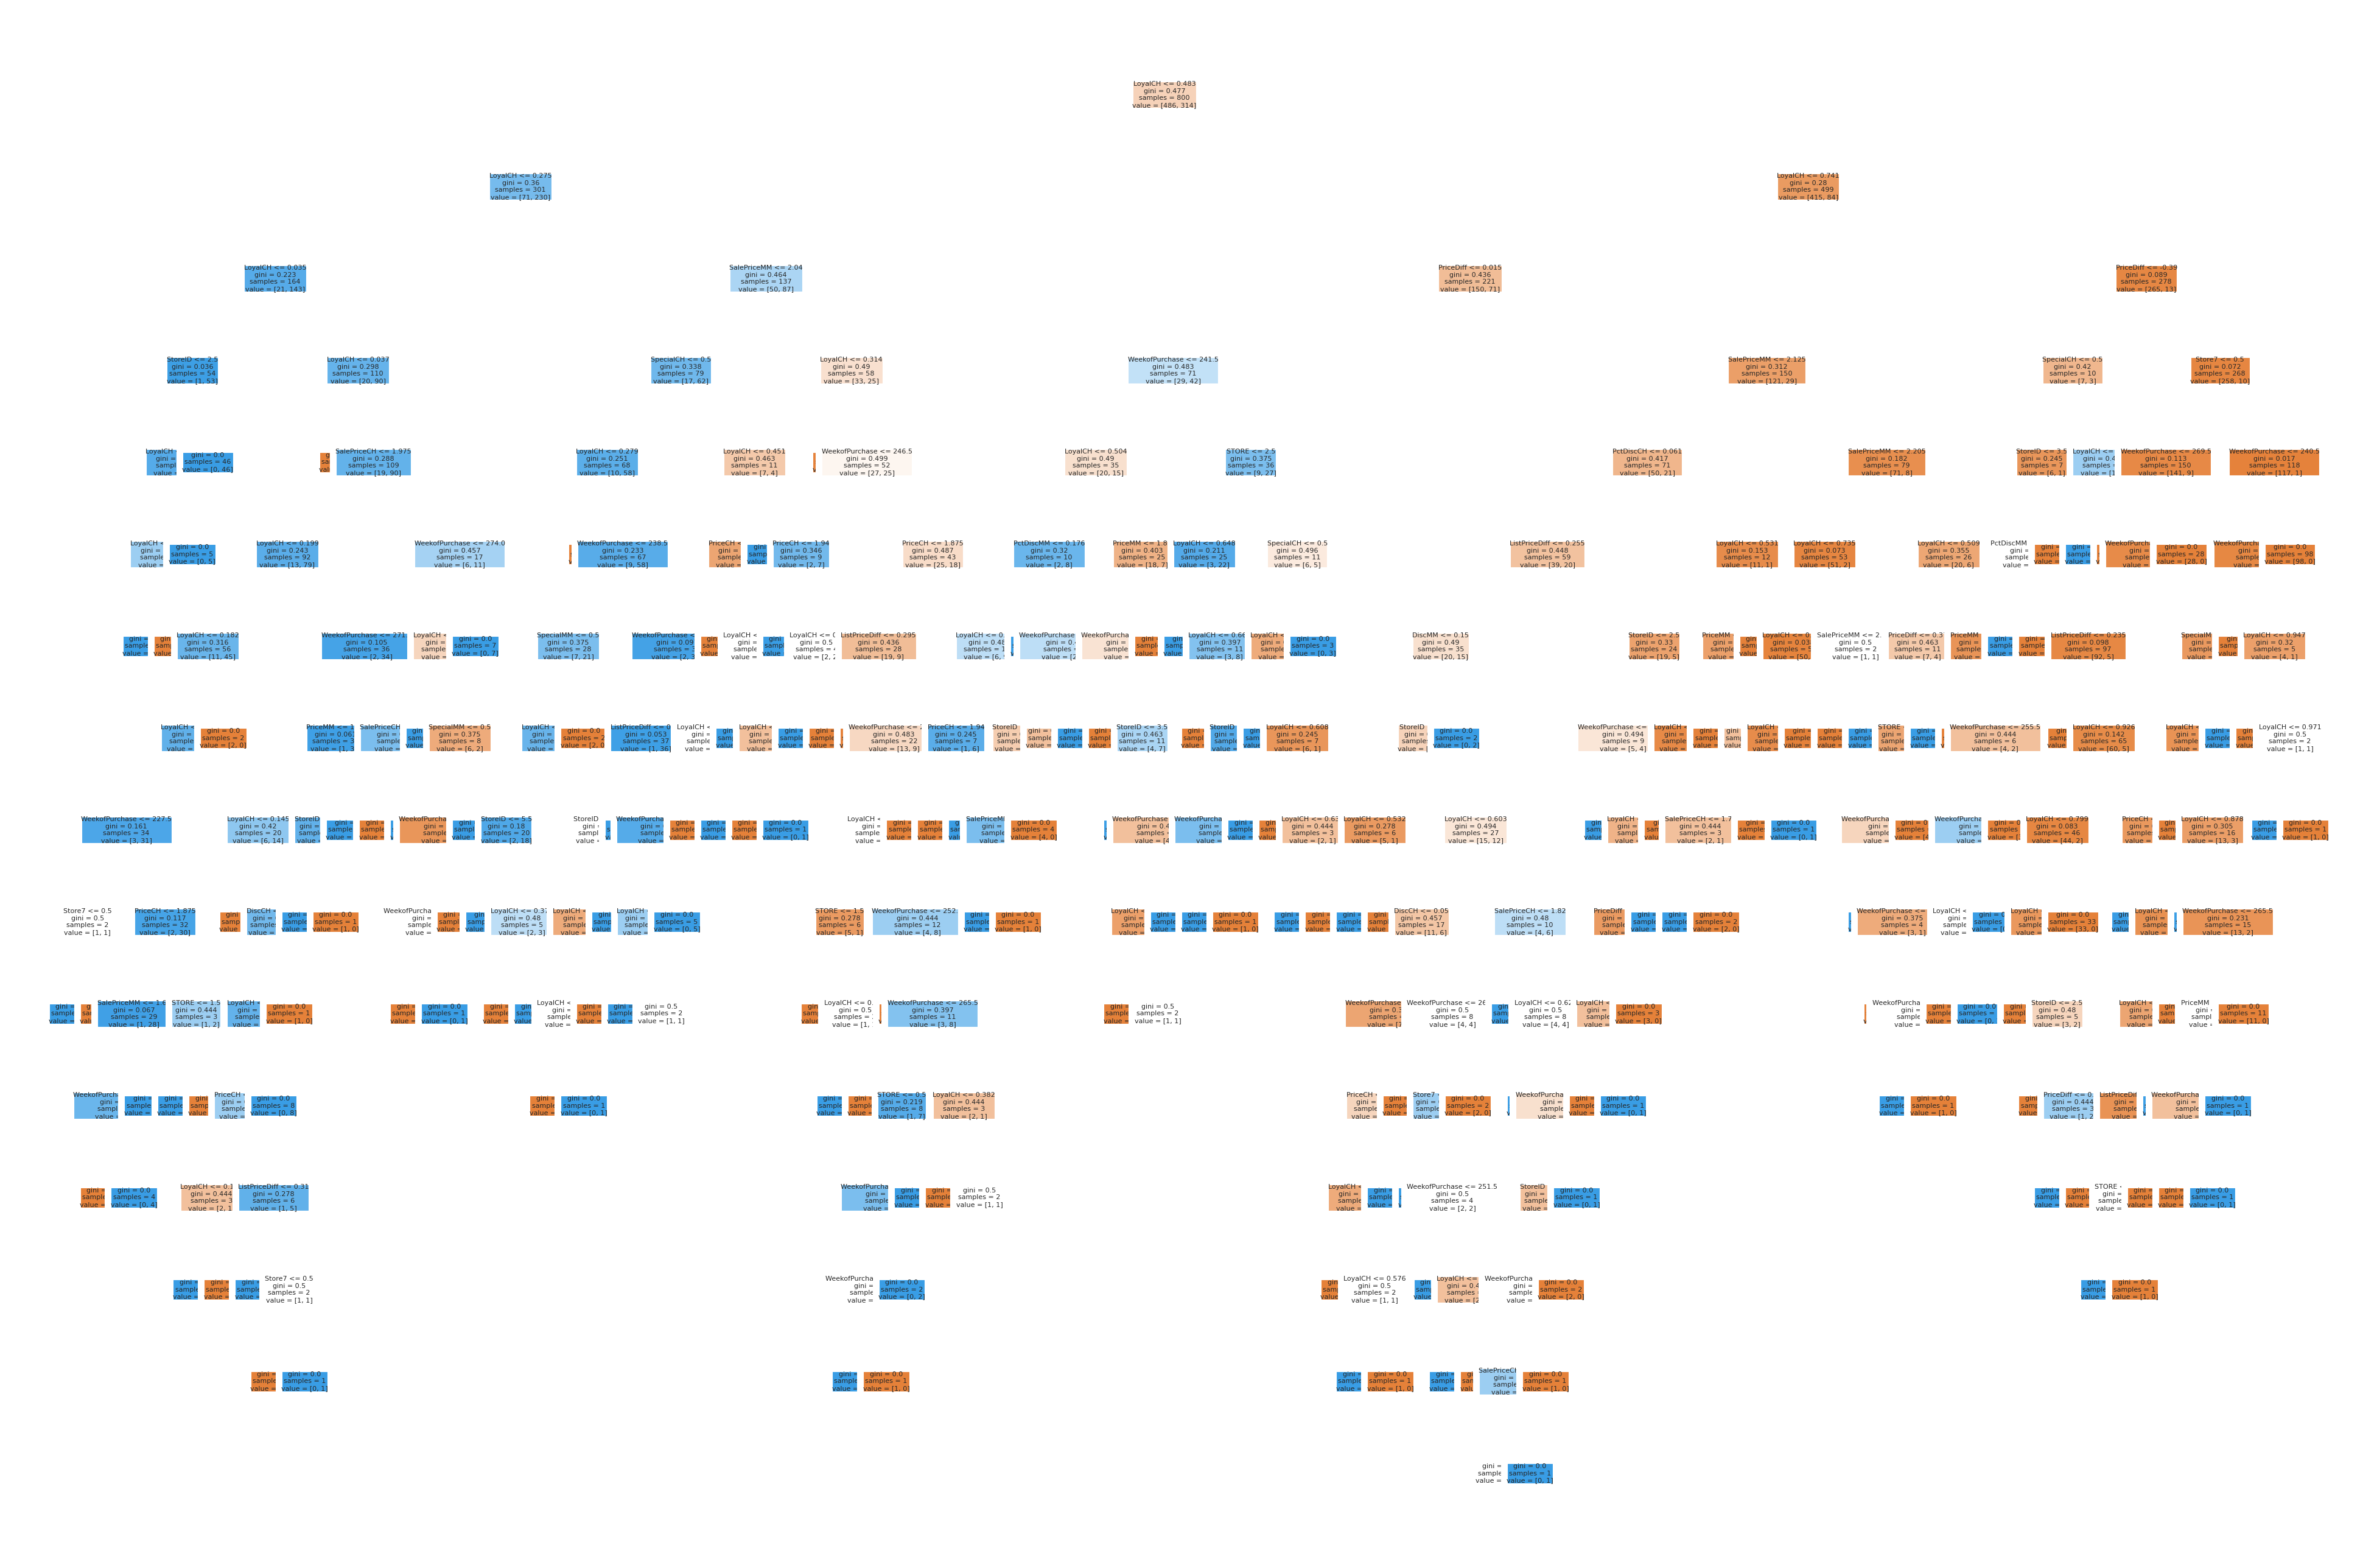

In [63]:
fig=plt.figure(dpi=800)
plot_tree(model_dt,filled=True,feature_names=X.columns)
plt.savefig('tree.png')
plt.show()

In [87]:
depths=range(8,30,1)
cv_scores=dict()
test_scores=dict()

for depth in depths:
    model=DecisionTreeClassifier(max_depth=depth,random_state=10)
    cv_score= cross_val_score(model,X_train,y_train, cv=5, scoring='accuracy').mean()
    
    model.fit(X_train,y_train)
    test_score=accuracy_score(y_test,model.predict(X_test))
    
    cv_scores[depth]=cv_score
    test_scores[depth]=test_score

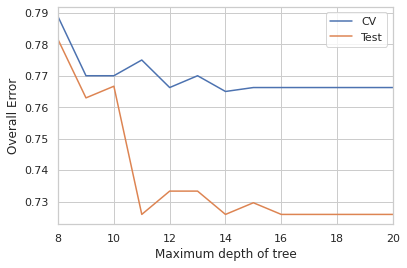

In [91]:
plt.plot(depths,[cv_scores[depth] for depth in depths],label='CV')
plt.plot(depths,[test_scores[depth] for depth in depths],label='Test')
plt.xlabel('Maximum depth of tree')
plt.ylabel('Overall Error')
plt.xlim(8,20)
plt.legend()

### Pruning

In [96]:
alphas=np.arange(0,0.01,0.001)
pr_cv_scores=dict()
pr_test_scores=dict()

for alpha in alphas:
    model=DecisionTreeClassifier(ccp_alpha=alpha,random_state=10)
    cv_score= cross_val_score(model,X_train,y_train, cv=5, scoring='accuracy').mean()
    
    model.fit(X_train,y_train)
    test_score=accuracy_score(y_test,model.predict(X_test))
    
    pr_cv_scores[alpha]=cv_score
    pr_test_scores[alpha]=test_score

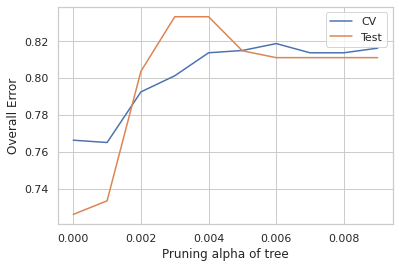

In [97]:
plt.plot(alphas,[pr_cv_scores[alpha] for alpha in alphas],label='CV')
plt.plot(alphas,[pr_test_scores[alpha] for alpha in alphas],label='Test')
plt.xlabel('Pruning alpha of tree')
plt.ylabel('Overall Error')
plt.legend()